1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi, erf
from scipy import stats
%matplotlib inline

x0 = 15
sigma = 2.5
mu = 6.3
w = mu -x0

y = stats.poisson.rvs(mu ,size = 100)

# Calculate the Z score
Z = abs(x0 - mu) / sigma
print("Z =", Z)
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))

# Compute p-value
print("p-value =", pvalue)

#probability of observing 15 or more hurricanes in a single year is therefore 0.05%, which is way smaller than
#the usale threshold of 5%. We can affirm that that number of hurricanes observed in a single year 
#is then suspicious

Z = 3.4799999999999995
p-value = 0.0005014137825610209


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T = -3.786997938137629


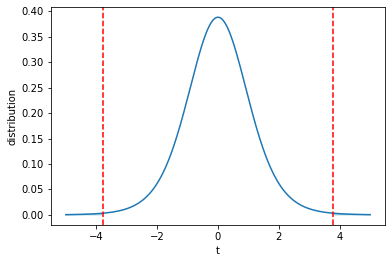

p-val: 0.004302464132864604


In [2]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

sigma_1 = np.sqrt(np.var(pre, ddof=1))
sigma_2 = np.sqrt(np.var(post, ddof=1))

sigma = np.sqrt((sigma_1**2+sigma_2**2)/2)

mean_pre = np.mean(pre)
mean_post = np.mean(post)

n = len(pre)
T = (mean_pre - mean_post) / (sigma * np.sqrt(2/n))

print("T =", T)

xs = np.linspace(-5, 5, 10000)
ts = stats.t.pdf(xs, n - 1)

plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='r')
plt.axvline(-T, linestyle='--', color='r')
plt.ylabel("distribution")
plt.xlabel("t")

plt.show()

print("p-val:", stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1)))

#the p-value is below the threshold, we can then reject the null hypothesis

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

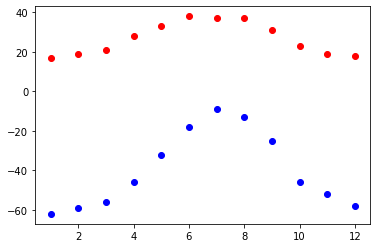

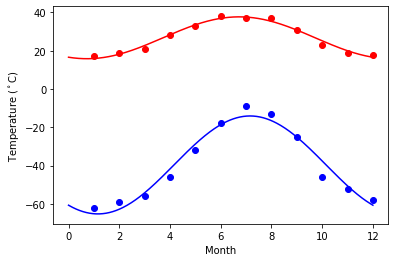

In [3]:
from scipy import optimize

t_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
t_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

x = np.linspace(1, 12, 12)
plt.scatter(x, t_max, color = 'r')
plt.scatter(x, t_min, color = 'b')

def f(times, avg, ampl, time_offset):
    return (avg + ampl * np.sin((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(f, x, t_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(f, x, t_min, [-40, 20, 0])
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(x, t_max, 'ro')
plt.plot(days, f(days, *res_max), 'r-')
plt.plot(x, t_min, 'bo')
plt.plot(days, f(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

#we have obtainied a reasonable fit

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

(array([0.01258461, 0.0178282 , 0.02574125, 0.09972352, 0.48813042,
        0.28849271, 0.04433216, 0.01391934, 0.00619697, 0.00305082]),
 array([-2.        , -1.60071429, -1.20142857, -0.80214286, -0.40285714,
        -0.00357143,  0.39571429,  0.795     ,  1.19428571,  1.59357143,
         1.99285714]),
 <BarContainer object of 10 artists>)

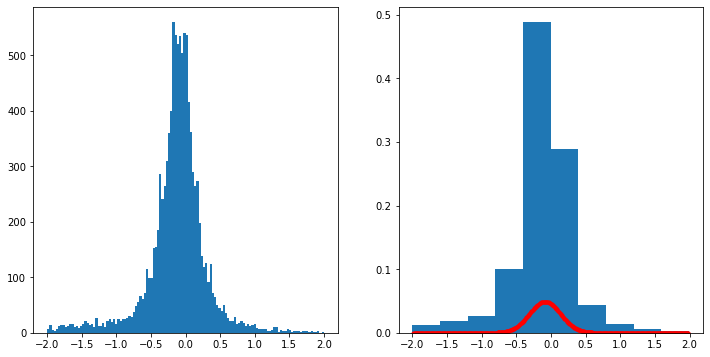

In [4]:
import pandas as pd
from scipy.stats import norm

data=np.load("residuals_261.pkl",allow_pickle=True).item()
df=pd.DataFrame(data,columns=['residuals'])
df = df.loc[abs(df['residuals'])<2, :]
#print(df)
fig_d, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
h, bins, _ = ax1.hist(df['residuals'], bins = 'auto', range = (-2, 2))
h=h/sum(h)
n=len(h)
x_hist=np.zeros((n),dtype=float) 
for i in range(n):
    x_hist[i]=(bins[i+1]+bins[i])/2
    
y_hist=h

def f(X,C,X_mean,sigma):
    return C*np.exp(-(X-X_mean)**2/(2*sigma**2))

mean = sum(x_hist*y_hist)/sum(y_hist)                  
sigma = sum(y_hist*(x_hist-mean)**2)/sum(y_hist) 

param_optimised,param_covariance_matrix = optimize.curve_fit(f,x_hist,y_hist,p0=[max(y_hist),mean,sigma])
x=np.linspace(np.min(x_hist),np.max(x_hist),500)
ax2.plot(x ,f(x,*param_optimised),'r.:',label='Gaussian fit')

#at this point the values of the histogram need to be normalized
weights = np.ones_like(df['residuals']) / len(df['residuals'])
ax2.hist(df['residuals'], weights=weights)


5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

the optimal values for parameters a, b, and c are:  [-9.67127679 12.34271735  9.0525621 ]
RSS f:  89065.61308498943
The average temperature predicted is:  8.958258092959857
The average temperature predicted for the hottest time of the year is:  18.723827711537297
The average temperature predicted for the coldest time of the year is:  -0.6143009843743616
RSS g:  90046.18623968406
Test 3-params vs 4-params:
p-value: 1.000 , additional parameter necessary: NO


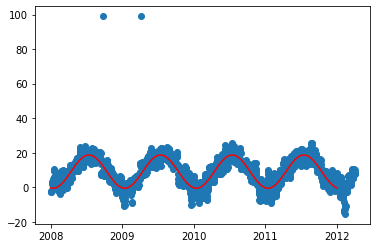

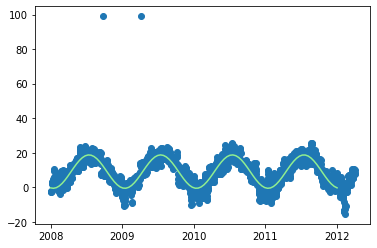

In [6]:
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data/
date,temperature = np.loadtxt('munich_temperatures_average_with_bad_data.txt', unpack=True)

def f(t, a, b, c):
    return a*np.cos(2*np.pi*t + b) + c

param_opt_f, param_cov = optimize.curve_fit(f, date,temperature)
plt.figure()
plt.scatter(date[4749:6300], temperature[4749:6300])
x = np.linspace(2008, 2012, 100)
plt.plot(x, f(x, *param_opt_f), color='red')



print('the optimal values for parameters a, b, and c are: ', param_opt_f)

#predict series of temperatures using the best parameters found
temp_pred = f(x, *param_opt_f)
x_2 = np.linspace(2008, 2012, 1551)
temp_pred_2 = f(x_2, *param_opt_f)
y = temperature[4749:6300]
ssr_1 = np.sum((temp_pred_2 - y)**2)
print('RSS f: ', ssr_1)
ndof_1 = 2

print('The average temperature predicted is: ', temp_pred.mean())
print('The average temperature predicted for the hottest time of the year is: ', temp_pred.max())
print('The average temperature predicted for the coldest time of the year is: ', temp_pred.min())
#the meaning of the b parameter is the phase of the function

def g(t, a, b, c, d):
    return a*np.cos(2*np.pi*t*b + c) + d
param_opt_g, param_cov = optimize.curve_fit(g, date,temperature)
plt.figure()
plt.scatter(date[4749:6300], temperature[4749:6300])
x = np.linspace(2008, 2012, 100)
plt.plot(x, g(x, *param_opt_g), color='lightgreen')

x_3 = np.linspace(2008, 2012, 1551)
temp_pred_3 = g(x_3, *param_opt_g)
y = temperature[4749:6300]
ssr_2 = np.sum((temp_pred_3 - y)**2)
print('RSS g: ', ssr_2)
ndof_2 = 3


def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < alpha else "NO")
    return pval


N = 1551
alpha = 0.05
print("Test 3-params vs 4-params:")
pval_1_vs_2 = Ftest(ssr_1, ssr_2, ndof_1, ndof_2, N, verbose=True)